In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#replacing blanks with 0 as tenture is 0 and no total charges are recorded

In [4]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [5]:
df.isnull().sum().sum()

0

In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [7]:
df["customerID"].duplicated().sum()

0

In [8]:
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"
df['SeniorCitizen'] = df["SeniorCitizen"].apply(conv)

#converted 0 and 1 values of senior citizen to yes/no to make it easier

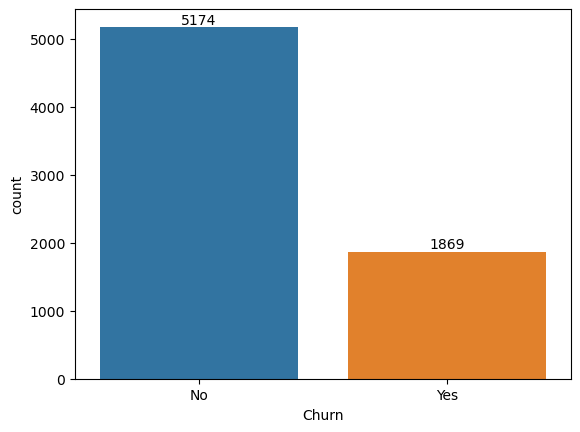

In [9]:
ax = sns.countplot(x = 'Churn', data = df)

ax.bar_label(ax.containers[0])
plt.show()

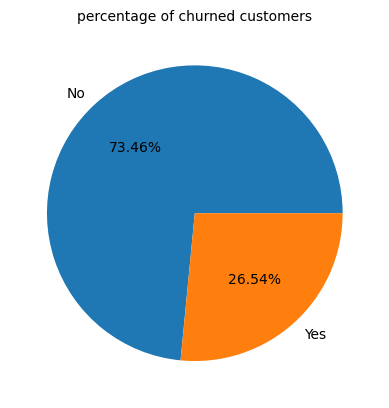

In [10]:
gb = df.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb['Churn'], labels =gb.index, autopct = "%1.2f%%")
plt.title("percentage of churned customers", fontsize = 10)
plt.show()

#from the given pie chart we can conclude that 26.54% of our customers has churned out #now let's find out the reason 


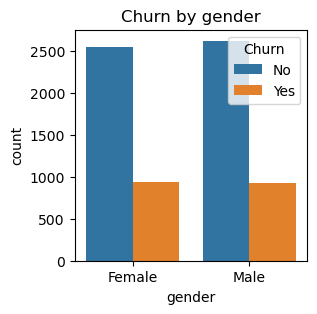

In [11]:
plt.figure(figsize = (3,3))
sns.countplot(x = "gender" , data = df, hue = 'Churn')
plt.title("Churn by gender")
plt.show()

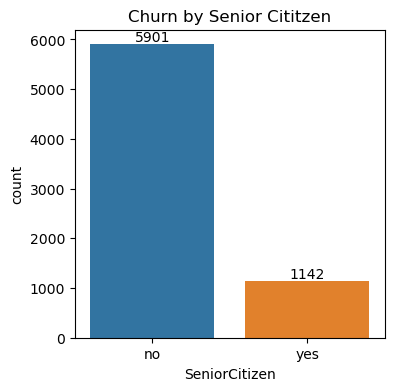

In [12]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = "SeniorCitizen" , data = df)
ax.bar_label(ax.containers[0])
plt.title("Churn by Senior Cititzen")
plt.show()

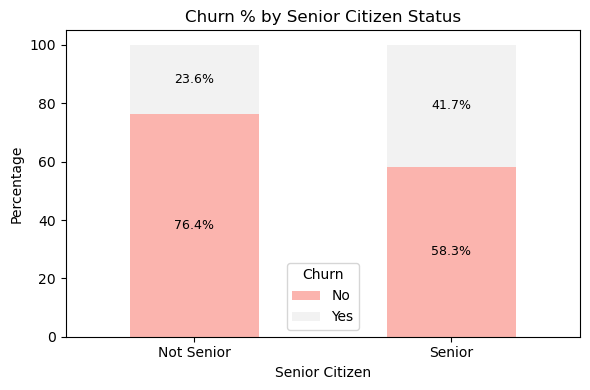

In [13]:
count_data = pd.crosstab(df['SeniorCitizen'], df['Churn'])

# Step 2: Convert counts to percentages
percent_data = count_data.div(count_data.sum(axis=1), axis=0) * 100

# Step 3: Plot
ax = percent_data.plot(kind='bar', stacked=True, figsize=(6,4), colormap='Pastel1')

# Step 4: Add percentage labels on bars
for i, total in enumerate(percent_data.iterrows()):
    y_offset = 0
    for churn_status in percent_data.columns:
        pct = percent_data.loc[total[0], churn_status]
        if pct > 0:
            ax.text(i, y_offset + pct/2, f'{pct:.1f}%', ha='center', va='center', fontsize=9)
            y_offset += pct

# Final touches
plt.title('Churn % by Senior Citizen Status')
plt.xlabel('Senior Citizen')
plt.ylabel('Percentage')
plt.xticks([0, 1], ['Not Senior', 'Senior'], rotation=0)
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

#comparticve a greater percentage of people in senior citizen category have churned out

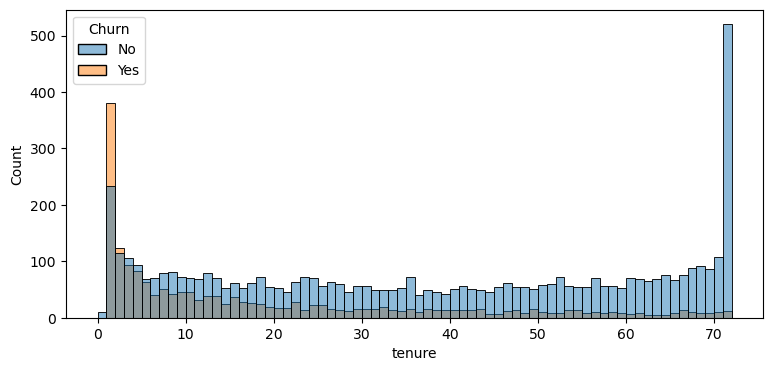

In [14]:
plt.figure(figsize = (9,4)) 
sns.histplot(x = "tenure", data = df, bins =72, hue ="Churn")
plt.show()

#people who have used our services for long time have stayed and people who have used for 1-2 months have churned out

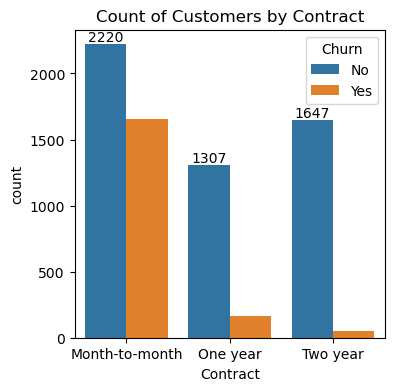

In [15]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = "Contract" , data = df, hue ="Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Contract")
plt.show()

#people who have month to month contract are likely to churn then those who have 1 or 2 years of cintract


In [16]:
df.columns.values


array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

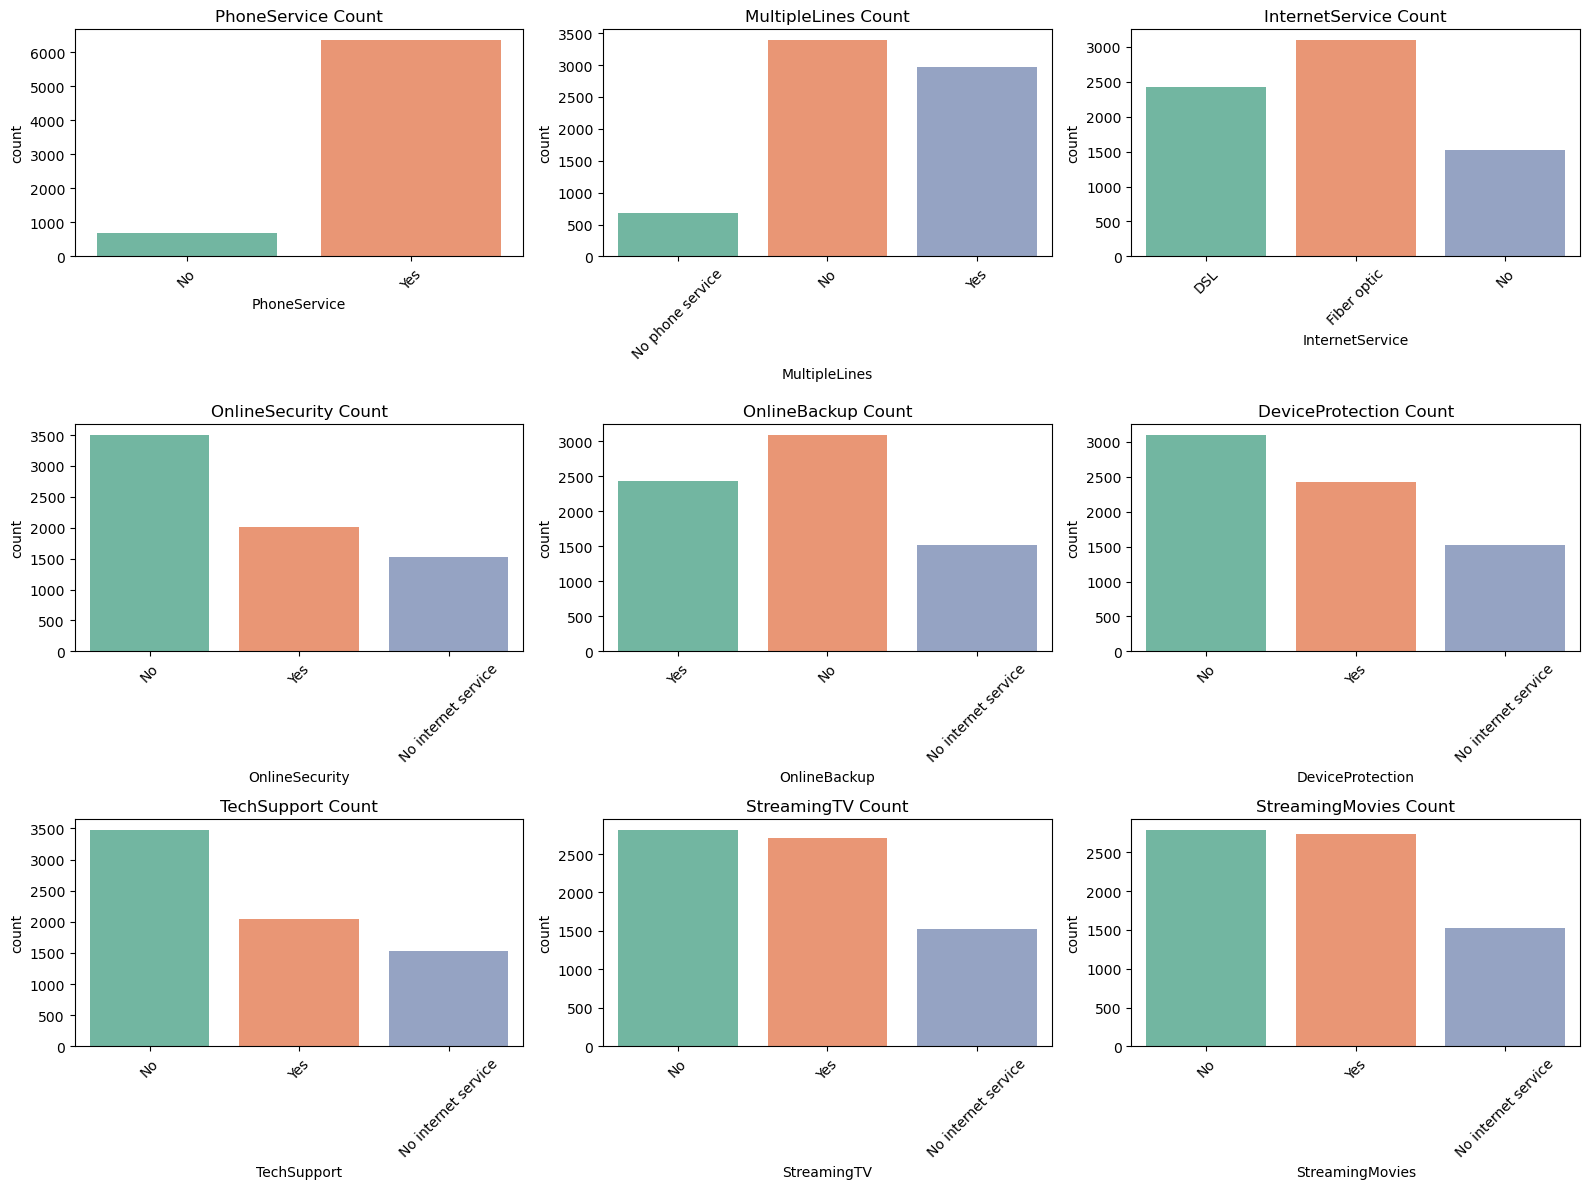

In [17]:
# List of columns
cols = ['PhoneService', 'MultipleLines', 'InternetService',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies']

# Set up the subplot grid
rows = 3
cols_per_row = 3
fig, axes = plt.subplots(rows, cols_per_row, figsize=(16, 12))
axes = axes.flatten()

# Plot countplots
for i, col in enumerate(cols):
    sns.countplot(x=col, data=df, ax=axes[i], palette='Set2')
    axes[i].set_title(f'{col} Count')
    axes[i].tick_params(axis='x', rotation=45)

# Remove any empty subplots (in case total columns < rows*cols_per_row)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


#The subplots show service usage patterns among customers across various telecom features. PhoneService has near-universal adoption, while MultipleLines and InternetService are also widely used. Optional services like OnlineSecurity, TechSupport, and DeviceProtection show lower adoption, with a majority selecting "No." StreamingTV and StreamingMovies have relatively balanced usage, though a notable portion of customers do not use them.

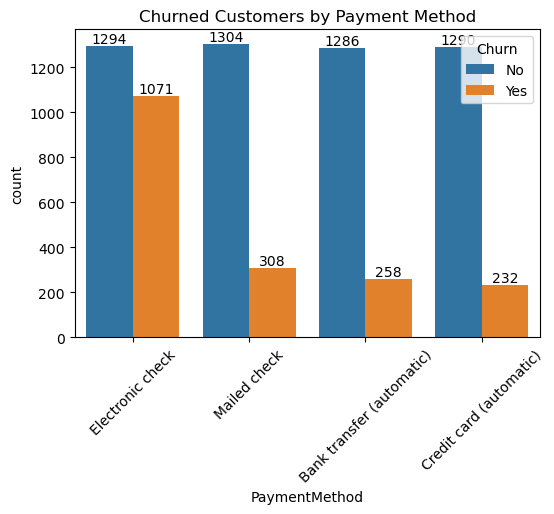

In [18]:
plt.figure(figsize = (6,4))
ax = sns.countplot(x = "PaymentMethod" , data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churned Customers by Payment Method")
plt.xticks(rotation= 45)
plt.show()

#customer is liekly to churn when he is using electronic check as payment method